In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [3]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

In [5]:
# create a session you'll work in
# you can think of this as a  "blank piece of paper" that you'll be writing
sess = tf_reset()

# define inputs
a = tf.constant(1.0)
b = tf.constant(2.0)

# do some operations
c  = a+ b

# get the result
c_run = sess.run(c)

print('c = {}'.format(c_run))

c = 3.0


In [6]:
sess = tf_reset()

# define inputs
a = tf.placeholder(dtype=tf.float32, shape=[1], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[1], name='b_placeholder')


# do some operations
c  = a+ b

# get the result
c0_run = sess.run(c, feed_dict={a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict={a: [2.0], b: [4.0]})

print('c0 = {}'.format(c0_run))
print('c1 = {}'.format(c1_run))

c0 = [3.]
c1 = [6.]


In [7]:
sess = tf_reset()

# define inputs
a = tf.placeholder(dtype=tf.float32, shape=[None], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[None], name='b_placeholder')


# do some operations
c  = a+ b

# get the result
c0_run = sess.run(c, feed_dict={a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict={a: [1.0, 2.0], b: [2.0, 4.0]})

print(a)
print('a shape: {}'.format(a.get_shape()))
print(b)
print('b shape: {}'.format(b.get_shape()))
print('c0 = {}'.format(c0_run))
print('c1 = {}'.format(c1_run))

Tensor("a_placeholder:0", shape=(?,), dtype=float32)
a shape: (?,)
Tensor("b_placeholder:0", shape=(?,), dtype=float32)
b shape: (?,)
c0 = [3.]
c1 = [3. 6.]


# 2. How to perform computations

In [9]:
sess = tf_reset()

# inputs
a = tf.constant([[-1.0], [-2.0], [-3.0]], dtype=tf.float32)
b = tf.constant([[1.0, 2.0, 3.0]], dtype=tf.float32)

a_run, b_run = sess.run([a, b])
print('a:\n{}'.format(a_run))
print('b:\n{}'.format(b_run))


a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[1. 2. 3.]]


In [10]:
c = b + b

c_run = sess.run(c)
print('b:\n{}'.format(b_run))
print('c:\n{}'.format(c_run))

b:
[[1. 2. 3.]]
c:
[[2. 4. 6.]]


In [12]:
c = a + b

c_run = sess.run(c)
print('a:\n{}'.format(a_run))
print('b:\n{}'.format(b_run))
print('c:\n{}'.format(c_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[1. 2. 3.]]
c:
[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]


In [15]:
c_elementwise = a * b
c_matmul = tf.matmul(b, a)

c_elementwise_run, c_matmul_run = sess.run([c_elementwise, c_matmul])

print('a:\n{}'.format(a_run))
print('b:\n{}'.format(b_run))
print('c_elementwise_run:\n{}'.format(c_elementwise_run))
print('c_matmul_run:\n{}'.format(c_matmul_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[1. 2. 3.]]
c_elementwise_run:
[[-1. -2. -3.]
 [-2. -4. -6.]
 [-3. -6. -9.]]
c_matmul_run:
[[-14.]]


In [16]:
c0 = b + b
c1 = c0 + 1

c0_run, c1_run = sess.run([c0, c1])
print('b:\n{}'.format(b_run))
print('c0:\n{}'.format(c0_run))
print('c1:\n{}'.format(c1_run))

b:
[[1. 2. 3.]]
c0:
[[2. 4. 6.]]
c1:
[[3. 5. 7.]]


In [17]:
c = tf.reduce_mean(b)

c_run = sess.run(c)
print('b:\n{}'.format(b_run))
print('c:\n{}'.format(c_run))

b:
[[1. 2. 3.]]
c:
2.0


# 3. How to create variable

In [21]:
sess = tf_reset()

# inputs
b = tf.constant([[1., 2., 3.]], dtype=tf.float32)

b_run = sess.run(b)
print('b:\n{}'.format(b_run))

b:
[[1. 2. 3.]]


In [22]:
var_init_value = [[2.0, 4.0, 6.0]]
var = tf.get_variable(
    name='myvar',
    shape=[1,3],
    dtype=tf.float32,
    initializer=tf.constant_initializer(var_init_value)
)
print(var)

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


In [25]:
print(tf.global_variables())

[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


In [26]:
# can do operations
c = b + var
print(b)
print(var)
print(c)

Tensor("Const:0", shape=(1, 3), dtype=float32)
<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>
Tensor("add:0", shape=(1, 3), dtype=float32)


In [27]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [29]:
c_run = sess.run(c)

print('b:\n{}'.format(b_run))
print('var:\n{}'.format(var_init_value))
print('c:\n{}'.format(c_run))

b:
[[1. 2. 3.]]
var:
[[2.0, 4.0, 6.0]]
c:
[[3. 6. 9.]]


# 4. How to train a neural network for a simple regression problem

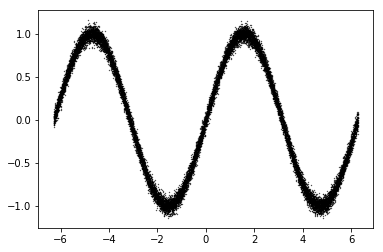

In [32]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10_000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs), 1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.show()

In [53]:
sess = tf_reset()

def create_model():
    #create inputs
    # shape: None -> state_size, 1 -> action_size
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
    # create variables
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.random_normal_initializer)
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.random_normal_initializer)
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.random_normal_initializer)
    
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer)
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer)
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer)
    
    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.relu, None]
    
    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred

input_ph, output_ph, output_pred = create_model()

# create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

#initialize variables
sess.run(tf.global_variables_initializer())
#create saver to save model variables
saver = tf.train.Saver()

# run training
batch_size = 32
for training_step in range(10_000):
    # get random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]

    # run the optimizer and get mse
    _, mse_run, = sess.run([opt, mse], feed_dict={input_ph: input_batch, output_ph: output_batch})

    # print the mse every often so
    if training_step % 1000 == 0:
        print('{0:04d}, mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, './model.ckpt')

0000, mse: 597.586
1000, mse: 0.061
2000, mse: 0.013
3000, mse: 0.017
4000, mse: 0.013
5000, mse: 0.024
6000, mse: 0.017
7000, mse: 0.014
8000, mse: 0.006
9000, mse: 0.011


INFO:tensorflow:Restoring parameters from ./model.ckpt


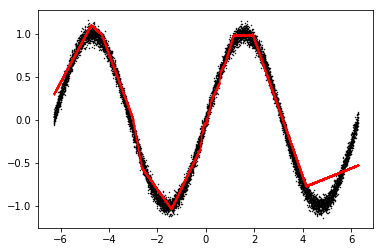

In [57]:
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, './model.ckpt')

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)
plt.show()

# 5. Tips and tricks 

### (a) Check your dimensions

In [36]:
# example of "suprising" resulting dims due to broadcasting
a = tf.constant(np.random.random((4,1)))
b = tf.constant(np.random.random((1,4)))
c = a * b
assert c.get_shape() == (4, 4)

### (b) Check what variables have been created

In [37]:
sess = tf_reset()
a = tf.get_variable('i_am_a_var', shape=[4, 6])
b = tf.get_variable('i_am_a_var_too', shape=[2, 7])
for var in tf.global_variables():
    print(var.name)

i_am_a_var:0
i_am_a_var_too:0


In [41]:
#help(tf.contrib.layers.fully_connected)

### (c) variable scope

In [ ]:
sess = tf_reset()

with tf.variable_scope('layer_0'):
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.random_normal_initializer)
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer)

with tf.variable_scope('layer_1'):
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.random_normal_initializer)
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer)

with tf.variable_scope('layer_2'):
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.random_normal_initializer)
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer)

# print the variables
var_names = sorted([v.name for v in tf.global_variables()])
print('\n'.join(var_names))